In [22]:
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [23]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

D:\anaconda\lib\site-packages\tensorflow\python\client\session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
tf.compat.v1.disable_eager_execution()

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import datetime
import tensorboard

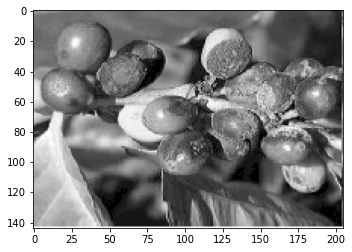

In [27]:
datadir= "C:/Users/student/Desktop/dataset/train"
categories=['berry_blotch', 'berry_disease', 'die_back', 'healthy', 'unknown']
for category in categories:
    path = os.path.join(datadir, category)#path to diseases dirrectories
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break       

In [28]:
#initializing the CNN
classifier = Sequential()

In [29]:
#adding layers to our network 
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

In [30]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (3, 3)))

In [31]:
classifier.add(Flatten())

In [32]:
#hidden layer
classifier.add(Dense(units = 128, activation = 'relu'))
#output layer
classifier.add(Dense(units = 5, activation = 'sigmoid'))

In [33]:
#tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [34]:
training_set = train_datagen.flow_from_directory('C:/Users/student/Desktop/dataset/Train', # relative path from working directoy
                                                 target_size = (128, 128),
                                                 batch_size = 10, class_mode = 'categorical')

Found 53 images belonging to 5 classes.


In [35]:
valid_set = test_datagen.flow_from_directory('C:/Users/student/Desktop/dataset/val', # relative path from working directoy
                                             target_size = (128, 128), 
                                        batch_size = 6, class_mode = 'categorical')

Found 28 images belonging to 5 classes.


In [36]:
labels = (training_set.class_indices)
print(labels)

{'berry_blotch': 0, 'berry_disease': 1, 'die_back': 2, 'healthy': 3, 'unknown': 4}


In [42]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

classifier.fit(training_set,
                         steps_per_epoch = 20,
                         epochs = 24,
                         validation_data=valid_set,
                         callbacks=[tensorboard_callback]
                         )

Epoch 1/24
20/20 [==============================] - 10s 504ms/step - batch: 9.5000 - size: 8.6000 - loss: 0.0026 - accuracy: 0.9942 - val_loss: 3.6866 - val_accuracy: 0.6429
Epoch 2/24
20/20 [==============================] - 9s 475ms/step - batch: 9.5000 - size: 9.3000 - loss: 0.0024 - accuracy: 0.9892 - val_loss: 3.4619 - val_accuracy: 0.6429
Epoch 3/24
20/20 [==============================] - 9s 464ms/step - batch: 9.5000 - size: 8.6000 - loss: 0.0012 - accuracy: 1.0000 - val_loss: 3.6739 - val_accuracy: 0.5714
Epoch 4/24
20/20 [==============================] - 10s 501ms/step - batch: 9.5000 - size: 8.9500 - loss: 0.0013 - accuracy: 0.9944 - val_loss: 3.8853 - val_accuracy: 0.6071
Epoch 5/24
20/20 [==============================] - 9s 456ms/step - batch: 9.5000 - size: 8.6000 - loss: 6.6599e-04 - accuracy: 1.0000 - val_loss: 3.8203 - val_accuracy: 0.6071
Epoch 6/24
20/20 [==============================] - 9s 471ms/step - batch: 9.5000 - size: 8.9500 - loss: 7.6702e-04 - accuracy: 0

In [40]:
#classifier_json=classifier.to_json()
#with open("model5.json", "w") as json_file:
 #   json_file.write(classifier_json)

In [ ]:
# serialize weights to HDF5
#classifier.save_weights("my_model_weights.h5")
#classifier.save("model4.h5")
#print("Saved model to disk")

In [ ]:
#import tensorflow as tf
#model=tf.keras.models.load_model("model4.h5")
#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#converter.experimental_new_converter = True
#tflite_model = converter.convert()
#open("converted_model.tflite", "wb").write(tflite_model) 

In [41]:
%reload_ext tensorboard
#%load_ext tensorboard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 12148), started 0:09:33 ago. (Use '!kill 12148' to kill it.)